### Stock Price Exploratory Data Analysis 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
#import talib as ta
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from re import sub
from decimal import Decimal

In [5]:
path =r"E:\Technocolabs\Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\NASDAQ Datasets\Nasdaq Stocks\HistoricalData_APPLE.csv"
df = pd.read_csv(path)

In [6]:
df.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$127.13,56877940,$127.21,$127.75,$126.52
1,06/08/2021,$126.74,74403770,$126.6,$128.46,$126.2101
2,06/07/2021,$125.9,71057550,$126.17,$126.32,$124.8321
3,06/04/2021,$125.89,75169340,$124.07,$126.16,$123.85
4,06/03/2021,$123.54,76229170,$124.68,$124.85,$123.13
5,06/02/2021,$125.06,59278860,$124.28,$125.24,$124.05
6,06/01/2021,$124.28,67637120,$125.08,$125.35,$123.94
7,05/28/2021,$124.61,71311110,$125.57,$125.8,$124.55
8,05/27/2021,$125.28,94625600,$126.44,$127.64,$125.08
9,05/26/2021,$126.85,56575920,$126.955,$127.39,$126.42


In [7]:
print(df.shape)
print("="*50)
print(df.dtypes)
print("="*50)
print(df.info())
print("="*50)


(2516, 6)
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB
None


### DATA PREPROCESSING

In [8]:
df['Date'] = pd.to_datetime(df.Date)
print(df.head(10))

        Date Close/Last    Volume      Open     High        Low
0 2021-06-09    $127.13  56877940   $127.21  $127.75    $126.52
1 2021-06-08    $126.74  74403770    $126.6  $128.46  $126.2101
2 2021-06-07     $125.9  71057550   $126.17  $126.32  $124.8321
3 2021-06-04    $125.89  75169340   $124.07  $126.16    $123.85
4 2021-06-03    $123.54  76229170   $124.68  $124.85    $123.13
5 2021-06-02    $125.06  59278860   $124.28  $125.24    $124.05
6 2021-06-01    $124.28  67637120   $125.08  $125.35    $123.94
7 2021-05-28    $124.61  71311110   $125.57   $125.8    $124.55
8 2021-05-27    $125.28  94625600   $126.44  $127.64    $125.08
9 2021-05-26    $126.85  56575920  $126.955  $127.39    $126.42


In [9]:
high = []
low = []
open1 = []
close1 = []
for i in df['Close/Last']:
    value = Decimal(sub(r'[^\d.]', '', i))
    close1.append(float(value))
for i in df['Open']:
    value = Decimal(sub(r'[^\d.]', '', i))
    open1.append(float(value))
for i in df['High']:
    value = Decimal(sub(r'[^\d.]', '', i))
    high.append(float(value))
for i in df['Low']:
    value = Decimal(sub(r'[^\d.]', '', i))
    low.append(float(value))
print(len(high), len(low), len(open1), len(close1))
df['Close/Last']=close1
df['High']=high
df['Low']=low
df['Open']=open1
df.head(10)

2516 2516 2516 2516


,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,127.13,56877940,127.210,127.75,126.5200
1,2021-06-08,126.74,74403770,126.600,128.46,126.2101
2,2021-06-07,125.90,71057550,126.170,126.32,124.8321
3,2021-06-04,125.89,75169340,124.070,126.16,123.8500
4,2021-06-03,123.54,76229170,124.680,124.85,123.1300
5,2021-06-02,125.06,59278860,124.280,125.24,124.0500
6,2021-06-01,124.28,67637120,125.080,125.35,123.9400
7,2021-05-28,124.61,71311110,125.570,125.80,124.5500
8,2021-05-27,125.28,94625600,126.440,127.64,125.0800
9,2021-05-26,126.85,56575920,126.955,127.39,126.4200


In [10]:
print(df.dtypes)
print("="*50)
print(df.describe())
print("="*50)
corr=df.corr()
print(corr)
print("="*50)


Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object
        Close/Last        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000
mean     41.277389  2.388826e+08    41.268871    41.698470    40.829849
std      30.304841  1.914594e+08    30.319067    30.698585    29.893474
min      11.261400  4.544820e+07    11.310000    11.346400    11.089300
25%      21.215550  1.092658e+08    21.244100    21.423600    20.992800
50%      29.592500  1.679334e+08    29.505000    29.810000    29.281250
75%      47.733750  3.022477e+08    47.770625    47.996250    47.371250
max     143.160000  1.498071e+09   143.600000   145.090000   141.370000
            Close/Last    Volume      Open      High       Low
Close/Last    1.000000 -0.429948  0.999656  0.999820  0.999823
Volume       -0.429948  1.000000 -0.42

### DATA VISUALIZATION

<AxesSubplot:xlabel='Open', ylabel='Volume'>

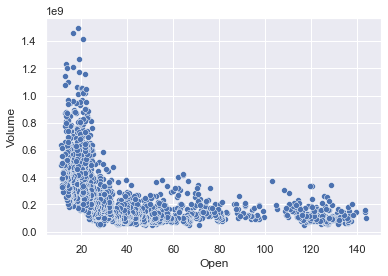

In [11]:
sns.scatterplot(x="Open",y="Volume",data=df)

<AxesSubplot:>

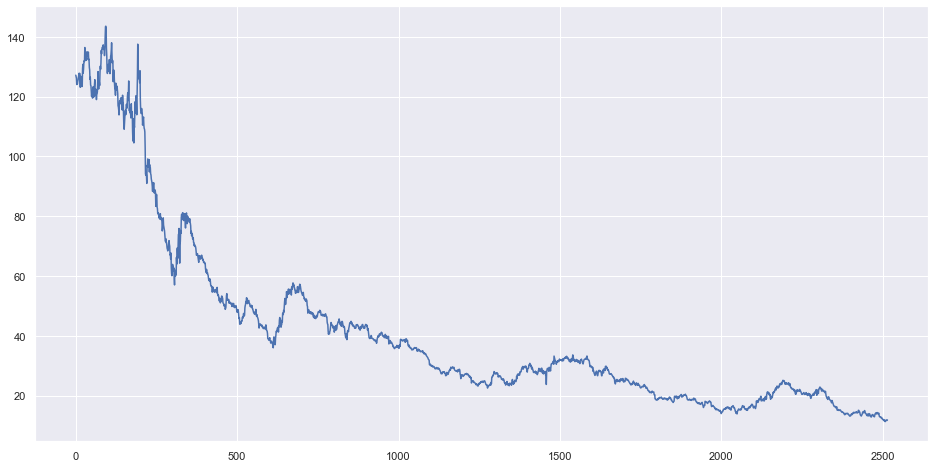

In [12]:
df['Open'].plot(figsize=(16,8))

<AxesSubplot:>

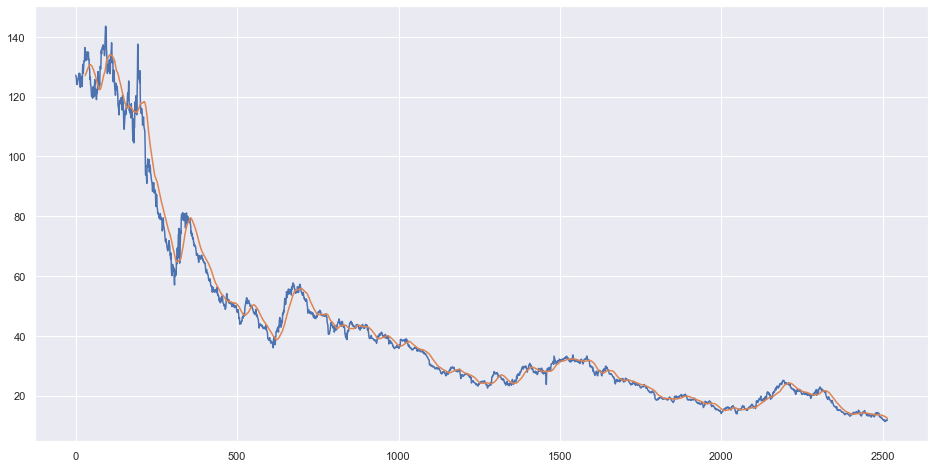

In [13]:
df['Open'].plot(figsize=(16,8))
df.rolling(window=30).mean()['Close/Last'].plot()

In [14]:
df.set_index('Date',inplace=True)


<AxesSubplot:xlabel='Date'>

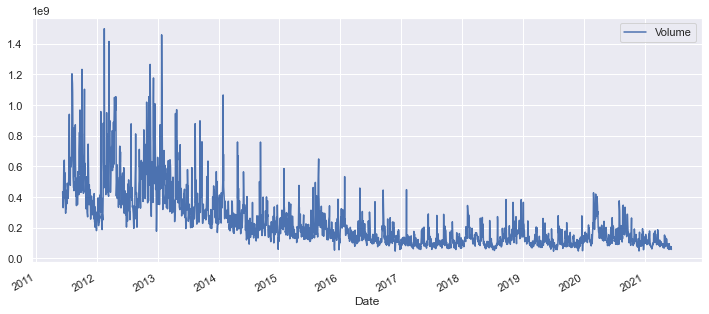

In [15]:
df.truncate(before='2011-06-10', after='2021-06-09')['Volume'].plot(legend=True,figsize=(12,5))

###  CHECKING THE MOVING AVERAGE

In [16]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Close/Last'].rolling(window=ma,center=False).mean()

df.tail()    

,Close/Last,Volume,Open,High,Low,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,
2011-06-16,11.6129,507299317,11.6750,11.7386,11.3689,11.66991,12.121685,12.975122
2011-06-15,11.6696,395841722,11.7768,11.7964,11.6029,11.64387,12.066290,12.941572
2011-06-14,11.8729,333995906,11.7857,11.9018,11.7611,11.63380,12.020615,12.910330
2011-06-13,11.6643,329376468,11.6857,11.7254,11.6096,11.61437,11.972135,12.876758
2011-06-10,11.6393,433801306,11.8054,11.8450,11.6254,11.61276,11.921955,12.854944


<AxesSubplot:xlabel='Date'>

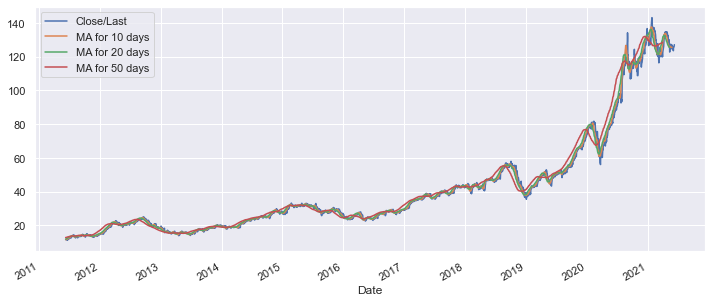

In [17]:
df.truncate(before='2011-06-10', after='2021-06-09')[['Close/Last','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### Calculating Daily Return

In [18]:
df['Daily Return'] = df['Close/Last'].pct_change()

<AxesSubplot:xlabel='Date'>

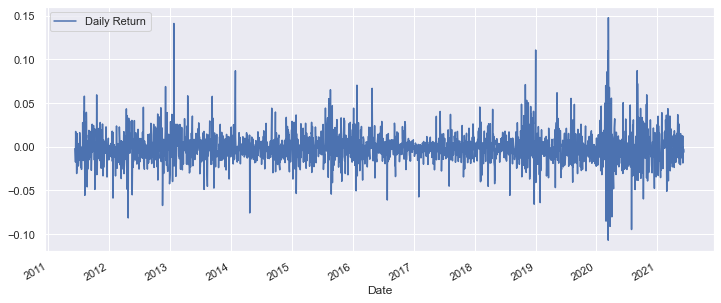

In [19]:
df.truncate(before='2011-06-10', after='2021-06-09')['Daily Return'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

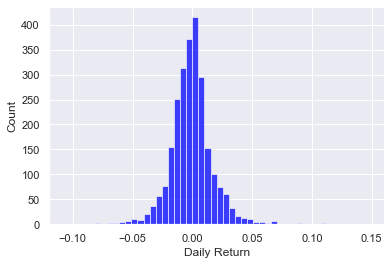

In [20]:
sns.histplot(df['Daily Return'].dropna(),bins=50,color='blue')

<Figure size 432x288 with 0 Axes>

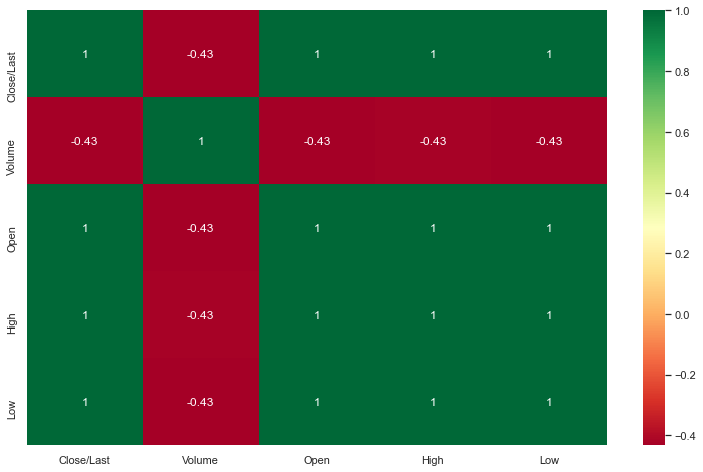

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.figure()

In [22]:
df.head()

,Close/Last,Volume,Open,High,Low,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,
2021-06-09,127.13,56877940,127.21,127.75,126.5200,NaN,NaN,NaN,NaN
2021-06-08,126.74,74403770,126.60,128.46,126.2101,NaN,NaN,NaN,-0.003068
2021-06-07,125.90,71057550,126.17,126.32,124.8321,NaN,NaN,NaN,-0.006628
2021-06-04,125.89,75169340,124.07,126.16,123.8500,NaN,NaN,NaN,-0.000079
2021-06-03,123.54,76229170,124.68,124.85,123.1300,NaN,NaN,NaN,-0.018667


In [23]:
df = df.dropna()
df = df.iloc[:,:5]
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-03-30,119.90,85671920,120.11,120.4031,118.8600
2021-03-29,121.39,80819200,121.65,122.5800,120.7299
2021-03-26,121.21,94071230,120.35,121.4800,118.9200
2021-03-25,120.59,98844680,119.54,121.6600,119.0000
2021-03-24,120.09,88530490,122.82,122.9000,120.0650


In [22]:
'''df['S_10'] = df['Close/Last'].rolling(window=10).mean()
df['Corr'] = df['Close/Last'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close/Last']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close/Last'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()

X = df.iloc[:,:9]
'''

In [25]:
df=df.dropna()
X = df.iloc[:,:9]
y = np.where(df['Close/Last'].shift(-1) > df['Close/Last'],1,-1)


In [26]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Defining the Model

In [27]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

### Chicking the Model Coeficient

In [28]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))


,0,1
0,Close/Last,[-4.3385307492914e-16]
1,Volume,[-1.9786720429971742e-10]
2,Open,[-3.7285706625419205e-16]
3,High,[-4.0046404413861947e-16]
4,Low,[-4.012587768073082e-16]


In [29]:
prob = model.predict_proba(X_test)
print(prob)

[[0.50973086 0.49026914]
 [0.51152023 0.48847977]
 [0.5155908  0.4844092 ]
 ...
 [0.5165157  0.4834843 ]
 [0.51628744 0.48371256]
 [0.5214456  0.4785544 ]]


In [30]:
prob = model.predict_proba(X_test)
print(prob)

pred = model.predict(X_test)

[[0.50973086 0.49026914]
 [0.51152023 0.48847977]
 [0.5155908  0.4844092 ]
 ...
 [0.5165157  0.4834843 ]
 [0.51628744 0.48371256]
 [0.5214456  0.4785544 ]]


### Confusion Matrix Representation


In [31]:
print(metrics.confusion_matrix(y_test, pred))


[[383   0]
 [358   0]]


In [32]:
print(metrics.classification_report(y_test, pred))



              precision    recall  f1-score   support

          -1       0.52      1.00      0.68       383
           1       0.00      0.00      0.00       358

    accuracy                           0.52       741
   macro avg       0.26      0.50      0.34       741
weighted avg       0.27      0.52      0.35       741



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy of the Model

In [33]:
print(model.score(X_test,y_test))


0.5168690958164642


### Performing Cross Validation

In [34]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.52631579 0.52631579 0.52631579 0.52631579 0.52631579 0.52631579
 0.52631579 0.52439024 0.52845528 0.52845528]
0.5265511339323918


### Creating Trading strategy

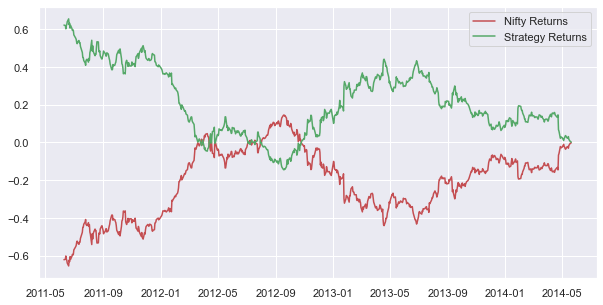

In [35]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close/Last']/df['Close/Last'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()